In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from regression2_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy
np.set_printoptions(formatter={'float': lambda x: format(x, '6.3f')}) # настройка вывода для матриц

# Полиномиальная регрессия

Задача: предсказание расхода топлива в зависимости от скорости для первой ступени ракеты.

In [3]:
X, y = get_data_for_fuel_prediction()

In [ ]:
print(X)

In [4]:
print(y)

(array([ 5.000, 16.600,  8.000, 26.150, 14.600, 40.400, 21.200, 23.500,
        38.200, 25.050, 29.350, 28.200, 11.050,  4.850,  4.850,  3.850,
        27.850, 29.550, 29.150, 15.400, 38.900,  4.550, 14.950, 30.150,
        23.500, 31.150, 32.500,  5.200, 33.050, 12.950, 23.550, 35.800,
        39.650, 19.900,  6.650, 16.700,  3.550, 34.450,  2.600, 27.800]),
 array([ 2.500,  4.150, 12.450,  7.950,  9.350, 18.450,  3.850,  3.900,
        18.400,  8.200, 12.700, 10.150, 10.850, 13.350, 12.400, 14.350,
         9.400, 13.250, 14.400,  4.650, 18.600, 15.600,  2.550, 15.600,
         6.900, 16.050, 13.200,  9.600, 17.800,  6.850,  5.700, 18.850,
        18.550,  2.200, 12.200,  1.550, 15.550, 18.250, 14.900, 15.900]))

## Предсказание линейной функцией

In [5]:
lin_theta = np.array([0.0, 0.0])
X_wo = np.column_stack([np.ones_like(X), X])

In [6]:
alpha = 0.001
iters = 100
lin_theta_opt = gradient_descent(lin_theta, X_wo, y, alpha, iters)

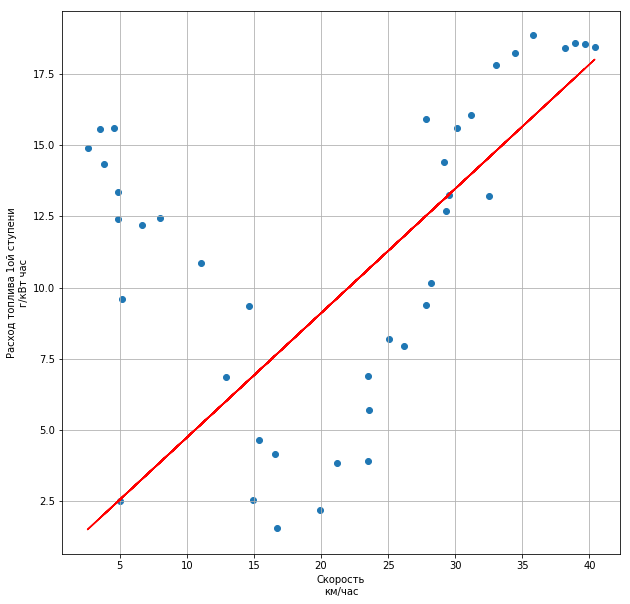

In [7]:
visualize_prediction(X, y, linear_function(X_wo, lin_theta_opt))

- Линейная регрессия хорошо работает в тех случаях, когда имеется линейная зависимость между данными. 

- Что делать, если данные распределены нелинейно, если зависимость более сложная?

## Полиномы

Полиномом степени $n$ называется функция:

$f(X) = \theta_n X^n + \theta_{n-1} X^{n-1}  \ldots + \theta_1 X + \theta_0$. 

Квадратное уравнение — это полином второй степени. 

$f(X) = \theta_2 X^2 + \theta_1 X + \theta_0$, или: 

$f(X) = a X^2 + b X + c$.

## Пример полиномов

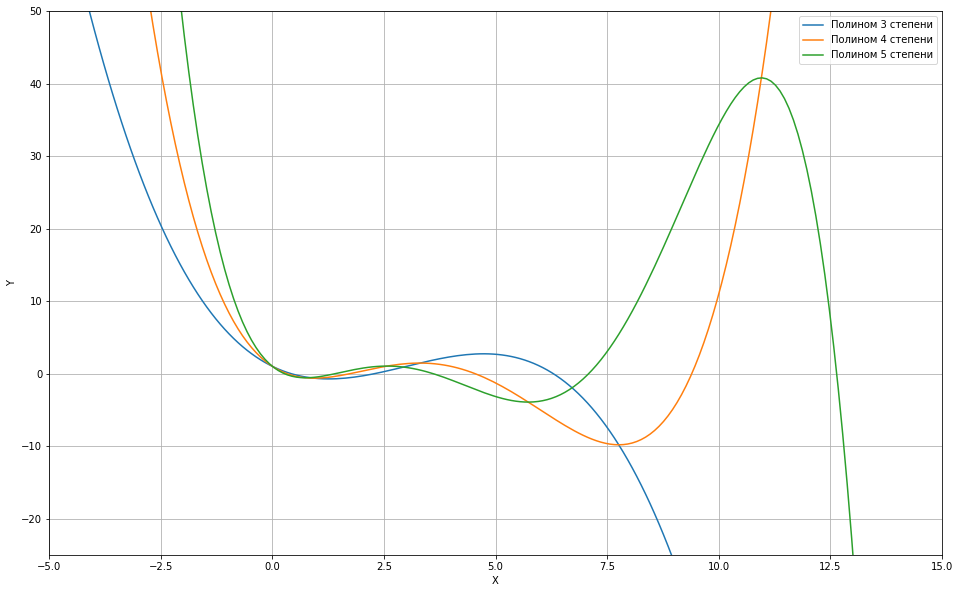

In [8]:
plot_polynoms()

## Полиномы для линейной регрессии

Текущая задача - нахождение расхода топлива 1-ой ступени в зависимости от скорости. 

Предположим, что эта зависимость описывается следующей функцией:

$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$

То есть, полиномом пятой степени.

Для получения этой функции может быть применена линейная регрессия.

Пусть есть функция: 

$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$

Это полином пятой степени одной переменной.

Его можно свести к линейной функции от 5-ти переменных.

Заменим:

$x_1 = x$

$x_2 = x^2$

$x_3 = x^3$

$x_4 = x^4$

$x_5 = x^5$.

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5$,

то есть линейная функция 5-ти переменных.

Составим матрицу из данных:

\begin{equation*}
\mathbf{X} = \begin{pmatrix}
1 & x_0 & x_0^2 &\dots & x_0^m\\
\cdots &\cdots &\cdots &\cdots & \cdots \\
1 & x_i & x_i^2 &\dots & x_i^m \\
\cdots &\cdots &\cdots &\cdots & \cdots \\
1& x_N & x_N^2 &\dots & x_N^m
\end{pmatrix} = \begin{pmatrix}
1 & x_{0, 1} & x_{0, 2} &\dots & x_{0, m}\\
\cdots &\cdots &\cdots &\cdots & \cdots \\
1 & x_{i, 1} & x_{i, 2} &\dots & x_{i, m} \\
\cdots &\cdots &\cdots &\cdots & \cdots \\
1& x_{N, 1} & x_{N, 2} &\dots & x_{N, m}
\end{pmatrix}  
\end{equation*}

В данном случае m=5.

Пусть $\Theta = (\theta_0, \ldots, \theta_i, \ldots, \theta_m)^T$

Тогда функция может быть представлена как:

$y = X\Theta$.

То есть, задача предсказания полинома сводиться к линейной регрессии.

## Полиномиальная регрессия на sklearn

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

poly_transformer = PolynomialFeatures(5)
X_poly = poly_transformer.fit_transform(X.reshape(-1, 1))

In [10]:
print(X_poly[:10])

[[ 1.000  5.000 25.000 125.000 625.000 3125.000]
 [ 1.000 16.600 275.560 4574.296 75933.314 1260493.006]
 [ 1.000  8.000 64.000 512.000 4096.000 32768.000]
 [ 1.000 26.150 683.822 17881.958 467613.212 12228085.481]
 [ 1.000 14.600 213.160 3112.136 45437.186 663382.910]
 [ 1.000 40.400 1632.160 65939.264 2663946.266 107623429.130]
 [ 1.000 21.200 449.440 9528.128 201996.314 4282321.848]
 [ 1.000 23.500 552.250 12977.875 304980.062 7167031.469]
 [ 1.000 38.200 1459.240 55742.968 2129381.378 81342368.624]
 [ 1.000 25.050 627.503 15718.938 393759.388 9863672.657]]


In [11]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_poly_scaled[:, 0] = 1

In [12]:
print(X_poly_scaled[:10])

[[ 1.000 -1.360 -1.122 -0.925 -0.784 -0.682]
 [ 1.000 -0.375 -0.615 -0.693 -0.682 -0.639]
 [ 1.000 -1.105 -1.043 -0.905 -0.779 -0.681]
 [ 1.000  0.437  0.210  0.002 -0.153 -0.258]
 [ 1.000 -0.544 -0.742 -0.769 -0.723 -0.660]
 [ 1.000  1.647  2.128  2.512  2.814  3.054]
 [ 1.000  0.016 -0.264 -0.434 -0.512 -0.534]
 [ 1.000  0.212 -0.056 -0.254 -0.373 -0.434]
 [ 1.000  1.460  1.778  1.980  2.092  2.142]
 [ 1.000  0.343  0.096 -0.111 -0.253 -0.340]]


In [13]:
regressor = LinearRegression().fit(X_poly_scaled, y)
y_pred = regressor.predict(X_poly_scaled)
print(mean_squared_error(y, y_pred))

5.977567849758967


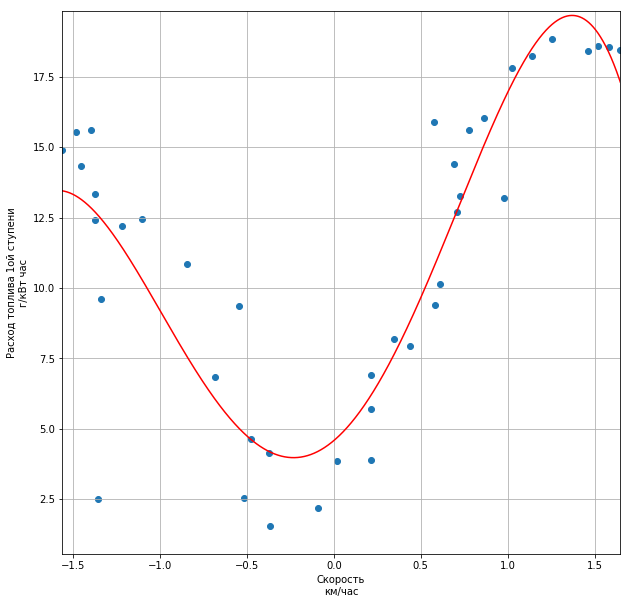

In [14]:
plot_poly_results(X_poly_scaled, y, poly_transformer, scaler, regressor)

## Переобучение

В прошлом примере степень полинома была выбрана равной пяти. 

Рассмотрим как будет себя вести полиномиальная регрессия с разными степенями полинома

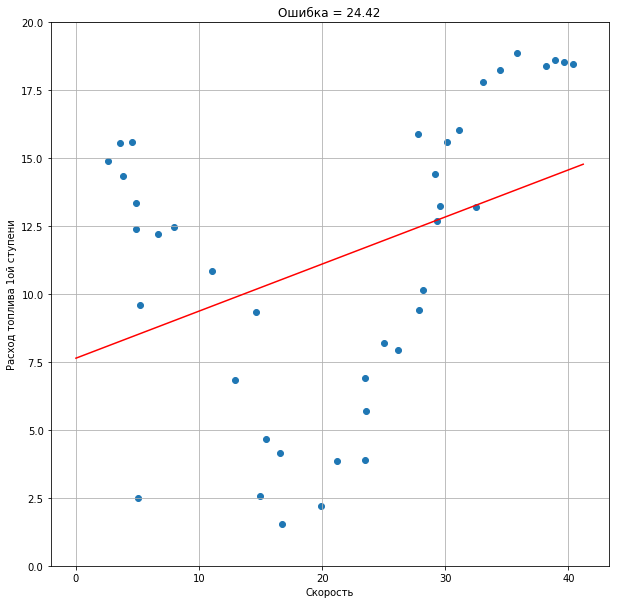

In [15]:
plot_polynom_with_data(X, y, deg=1)

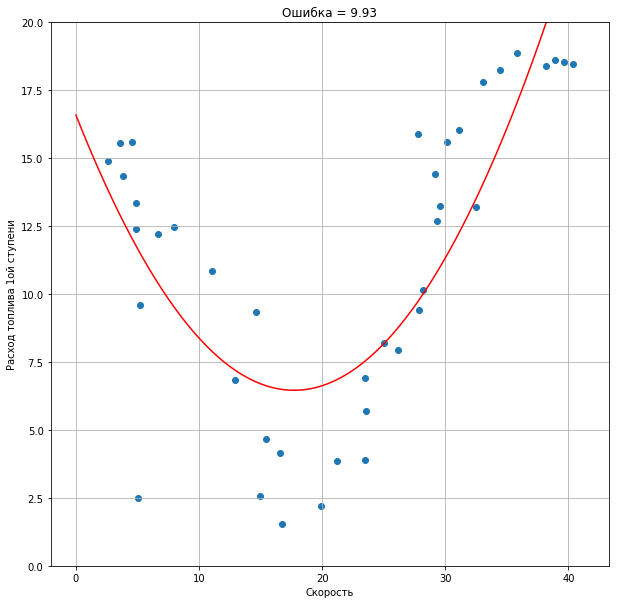

In [16]:
plot_polynom_with_data(X, y, deg=2)

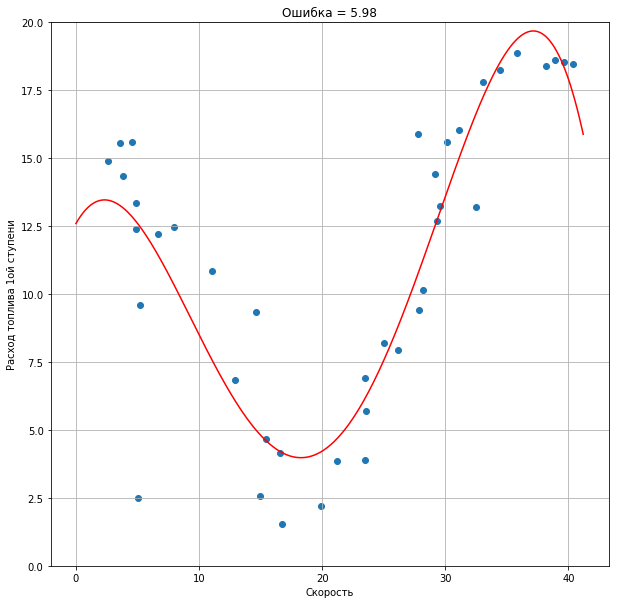

In [17]:
plot_polynom_with_data(X, y, deg=5)

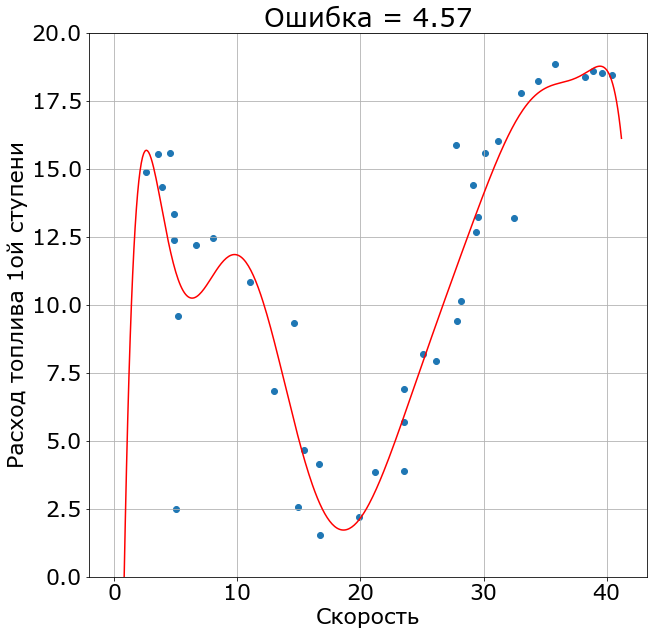

In [40]:
plot_polynom_with_data(X, y, deg=10)

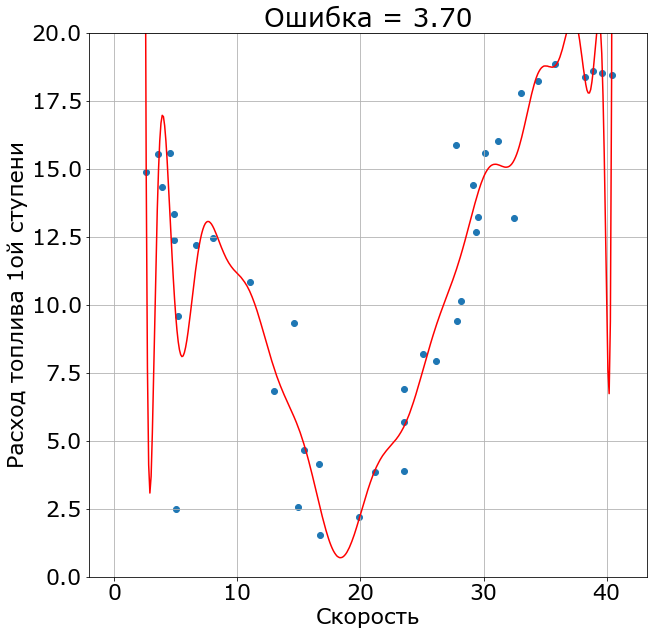

In [39]:
plot_polynom_with_data(X, y, deg=30)

Допустим были получены новые данные.

In [22]:
X_test, y_test = get_more_data_for_polynom()

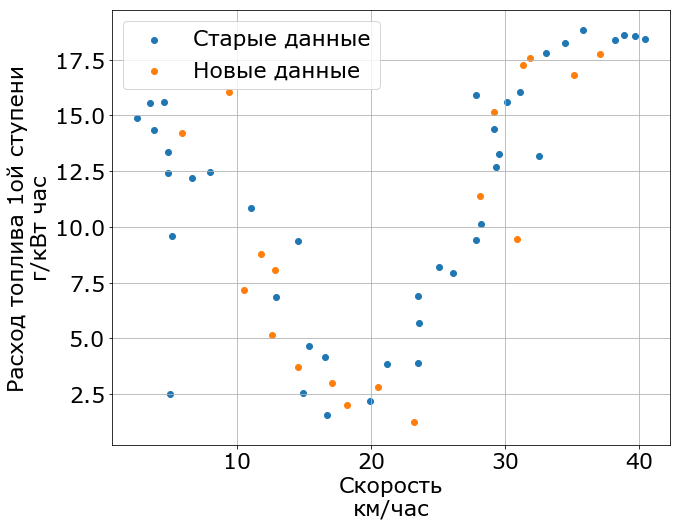

In [23]:
plot_fuel_data(X, y, X_test, y_test)

Добавим на график значение функции ошибки на новых данных. При этом, сама полиномиальная регрессия будет строиться по старым данным.

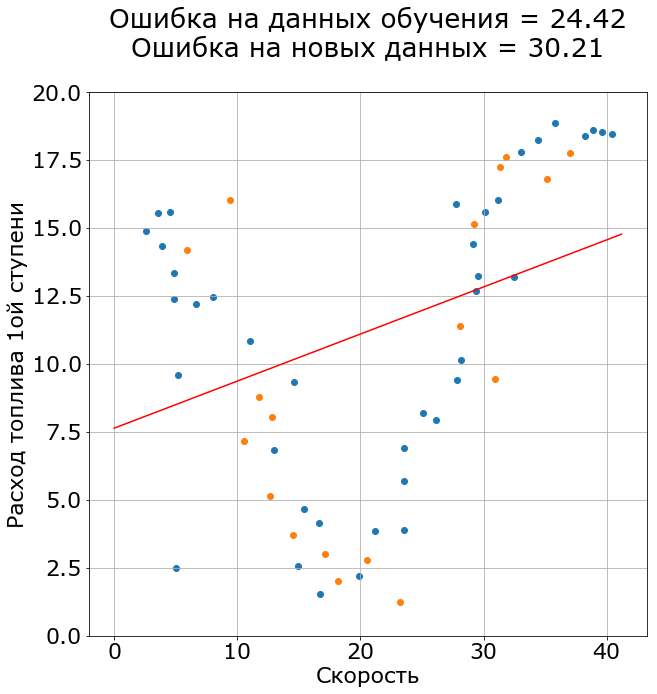

In [26]:
plot_polynom_with_data(X, y, deg=1, X_test=X_test, y_test=y_test)

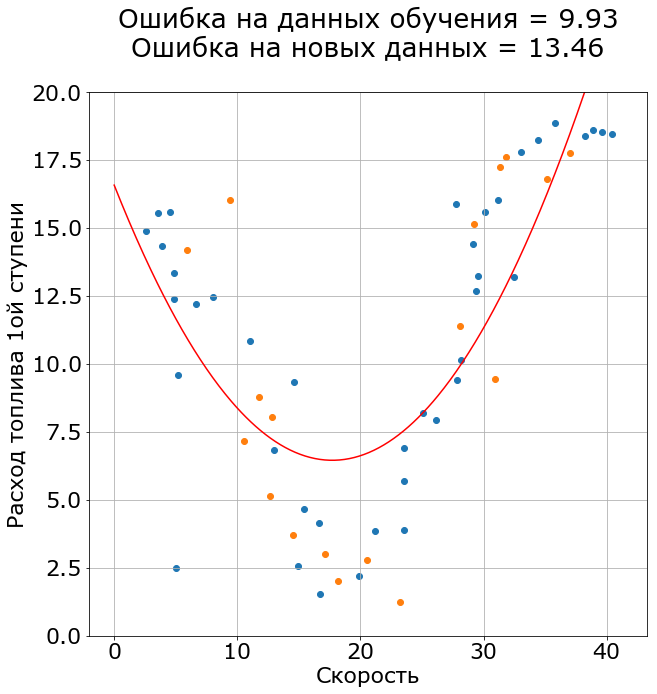

In [28]:
plot_polynom_with_data(X, y, deg=2, X_test=X_test, y_test=y_test)

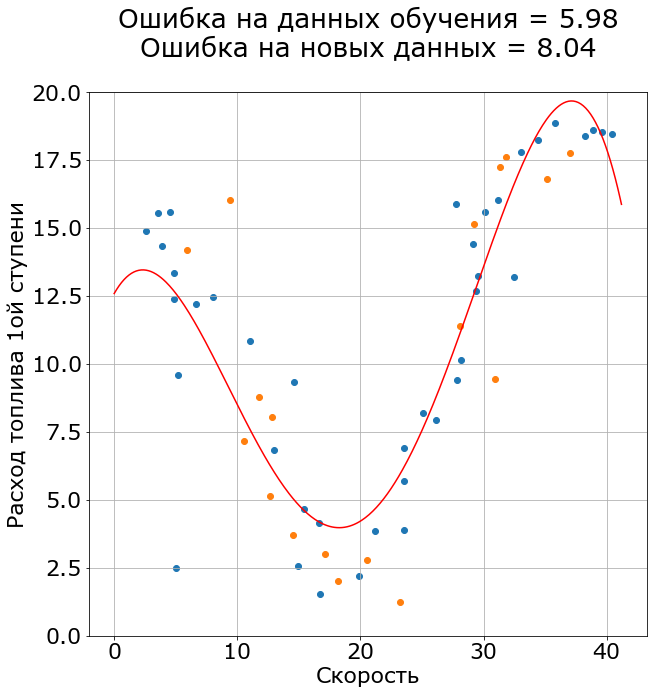

In [27]:
plot_polynom_with_data(X, y, deg=5, X_test=X_test, y_test=y_test)

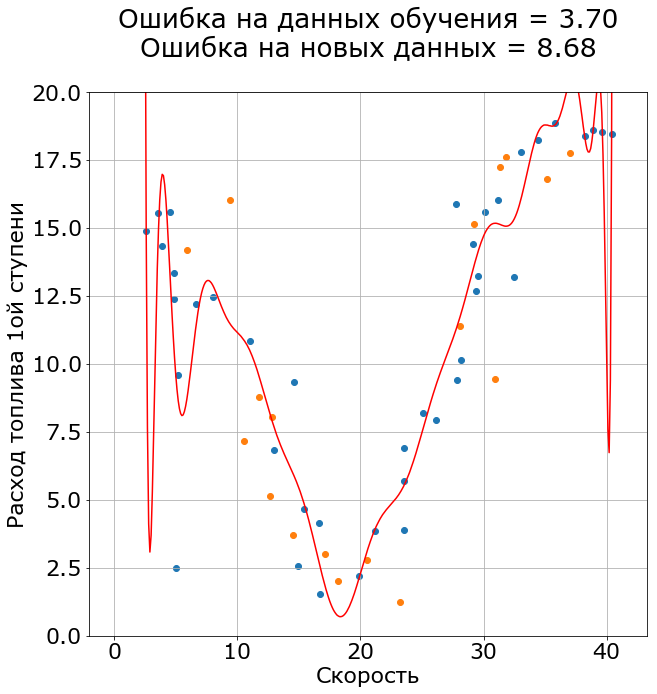

In [36]:
plot_polynom_with_data(X, y, deg=30, X_test=X_test, y_test=y_test)

Переобучение:

Модель очень хорошо подобрала параметры для данных на которых она обучалась. 

Но модель делает неправильные предсказания на данных, которые она до этого не видела.

# Train test split

Для борьбы с переобучением набор данных делиться на два сета:
    1. Набор для тренировки.
    2. Набор для тестирования.
    
Обычно 80% идет на набор для тренировки. 

## Оценка модели

* Недообучение: большая ошибка на тренировочных и тестированных данных.

* Переобучении: маленькая ошибка на тренировочных данных и большая ошибка тестированных данных.

* Хорошо обученная модель: маленькая ошибка на тренировочных данных и маленькая ошибка тестированных данных.